In [1]:

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from geofree.util import get_local_path, OmegaConf
from geofree.main import instantiate_from_config
import torchvision.transforms as transforms
import torch

import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import torchvision.models as models
import copy
# Import Path
from pathlib import Path


model="re_impl_nodepth"
prefix = model[:2]
assert prefix in ["re", "ac"], "not implemented"

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

c:\Users\USER\anaconda3\envs\geofree\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data_folder = "../../../Realstate10K/RealEstate10K_Downloader/RealEstate10K/saved_codes/"
data_files = os.listdir(data_folder)
data_files = [f for f in data_files if f.endswith(".npy")]


In [3]:

scene_to_num = {'0000cc6d8b108390.npy': 0,
 '000c3ab189999a83.npy': 1,
 '000d2139ad05dc85.npy': 2,
 '000db54a47bd43fe.npy': 3,
 '000e285b03f3fddf.npy': 4,
 '00a50bfbce75d465.npy': 5,
 '00a5a09a0c68b59b.npy': 6,
 '00a5cfccd6508e96.npy': 7,
 '00a7a9c0ea61670d.npy': 8,
 '00a861d699fb7797.npy': 9,
 '00a87dd567cdc292.npy': 10,
 '00a9f110ad222aa4.npy': 11,
 '0a0b1ce8a70f8c0c.npy': 12,
 'b053f2ffb587f61a.npy': 13,
 'b054fb5ce2f8e1f2.npy': 14,
 'b53a8e8d3caa0f66.npy': 15,
 'b53b27fdad29cf8d.npy': 16,
 'b53bba5522b4b8f1.npy': 17,
 'b53c5559170c4f78.npy': 18,
 'b53cda0b95d897a8.npy': 19,
 'b53cea58c1e95448.npy': 20,
 'b53dacad44c35ce1.npy': 21,
 'b53e3ec3e9b46c8f.npy': 22,
 'fe002afe708218f0.npy': 23,
 'fe0147fed23f771f.npy': 24,
 'fe028bc21123c8f1.npy': 25,
 'fe02addf27f31c95.npy': 26,
 'fe04fd49c46f2fc1.npy': 27,
 'fe0501936e490d21.npy': 28,
 'fe05283c708c2589.npy': 29,
 'fe06a555231819c0.npy': 30,
 'fe07d4791305e06d.npy': 31,
 'fe08a0854434930a.npy': 32,
 'fe1073d78503215c.npy': 33,
 'fe11db7072e7666e.npy': 34,
 'fe14169fb3dbe5b6.npy': 35,
 'fe171f90f688619c.npy': 36,
 'fe182ab98e3df748.npy': 37,
 'fe18c2f228437463.npy': 38,
 'fe1e39063abd5205.npy': 39,
 'fe1f82f2988800c4.npy': 40,
 'fe1fc09277b8a000.npy': 41,
 'fe1fd63f87c9b7b6.npy': 42,
 'fe1fe887ee20d877.npy': 43,
 'fe20982cb46ccdfc.npy': 44,
 'fe221061f650ccca.npy': 45,
 'fe2250f23e91261e.npy': 46,
 'fe23698b552751d5.npy': 47,
 'fe25b6af549cfdd4.npy': 48,
 'fe2632b437de3932.npy': 49,
 'fe263d56b953be62.npy': 50,
 'fe29e91e88463528.npy': 51,
 'fe2b27b75b492744.npy': 52,
 'fe2c764518e7a72a.npy': 53,
 'fe2cac7ee883ee3f.npy': 54,
 'fe2df6a236f5bc79.npy': 55,
 'fe2eddcb5f8419b0.npy': 56,
 'fe3356c41851577a.npy': 57,
 'fe341ea0810284ca.npy': 58,
 'fe35152fdacbc8ed.npy': 59,
 'fe356da855cd3c76.npy': 60,
 'fe366a0fc6fbf5a9.npy': 61,
 'fe384d84d04baec0.npy': 62,
 'fe389d965307b43e.npy': 63,
 'fe3c04bb10b12d55.npy': 64,
 'fe3e66753cbe98b1.npy': 65,
 'fe3e8063136b92e1.npy': 66,
 'fe3eb89cdb313955.npy': 67,
 'fe41521588b2ba41.npy': 68,
 'fe46571be21af2cb.npy': 69,
 'fe469a7381a1276a.npy': 70,
 'fe480b077979046e.npy': 71,
 'fe4cc085e4b2ddd0.npy': 72,
 'fe4e3ea09f7354a3.npy': 73,
 'fe4e50caf065e8ad.npy': 74,
 'fe4eaee590abcebc.npy': 75,
 'fe4fa50ac12f51b0.npy': 76,
 'fe50b06ab180e0a3.npy': 77,
 'fe50b8ab71db6ff7.npy': 78,
 'fe50cfbbdd716600.npy': 79,
 'fe529b17be1d94ed.npy': 80,
 'fe52b77f0328d7be.npy': 81,
 'fe53ac06ff2c6263.npy': 82,
 'fe53ed83c38418f9.npy': 83,
 'fe545b889554fa8f.npy': 84,
 'fe55cd1565d9cb79.npy': 85,
 'fe56991a6957c763.npy': 86,
 'fe59d86ddd3acba2.npy': 87,
 'fe5c3e12d699d77f.npy': 88,
 'fe5e06cd40924c05.npy': 89,
 'fe5fa1ae55df64ca.npy': 90,
 'fe6191ddd210d92c.npy': 91,
 'fe6348dd3b06de6a.npy': 92,
 'fe641bc585cf3204.npy': 93,
 'fe65c2bd94b30489.npy': 94,
 'fe6612a4ad77c1a5.npy': 95,
 'fe680481685483c7.npy': 96,
 'fe6824a4a09b11e0.npy': 97,
 'fe69d8126c17d637.npy': 98,
 'fe6a15ffdc20f1d4.npy': 99,
 'fe6b9b80b0e6a8d6.npy': 100,
 'fe74e8b09f280965.npy': 101,
 'fe759d52e38b706b.npy': 102,
 'fe76916bbbcc9bfd.npy': 103,
 'fe7834fcbdafda3b.npy': 104,
 'fe792f41f069b4c0.npy': 105,
 'fe7c97bd3da46cf2.npy': 106,
 'fe83cdddf24659c6.npy': 107,
 'fe85b3be4adb42aa.npy': 108,
 'fe8614f92636fb9d.npy': 109,
 'fe86d8ea3e0d4c7e.npy': 110,
 'fe88b975469701fb.npy': 111,
 'fe8947b78c04fa0e.npy': 112,
 'fe8ae6eee5f22cb5.npy': 113,
 'fe8bff5ab1ce6145.npy': 114,
 'fe8c395dd70d4844.npy': 115,
 'fe8feaca8c0571aa.npy': 116,
 'fe90475a8c70802c.npy': 117,
 'fe9263e6769a380d.npy': 118,
 'fe949482103cc3ff.npy': 119,
 'fe95b1b2cd2306fd.npy': 120,
 'fe95d4af8c50f45f.npy': 121,
 'fe973886ef233d3b.npy': 122,
 'fe97cf55ef4f6e50.npy': 123,
 'fe989e36a3ecd67f.npy': 124,
 'fe995c70c1839ab6.npy': 125,
 'fe9a2e828f309e18.npy': 126,
 'fe9c6c63360e43c2.npy': 127,
 'fe9c9efa162243af.npy': 128,
 'fe9d806cb3061f25.npy': 129,
 'fea1563243b60527.npy': 130,
 'fea172f3d8b10e02.npy': 131,
 'fea1c01a1b763526.npy': 132,
 'fea20641f75fac55.npy': 133,
 'fea26d7b2563b027.npy': 134,
 'fea3f95a45ab50a6.npy': 135,
 'fea44120298bded7.npy': 136,
 'fea5962ba2801a13.npy': 137,
 'fea6f9b0be94efbf.npy': 138,
 'fea89074647e4381.npy': 139,
 'fea9ce3b762194ac.npy': 140,
 'fea9de2cc9e3c9f4.npy': 141,
 'fea9df7bb5b4a7de.npy': 142,
 'feac8b784fcd5592.npy': 143,
 'feaf9bdc8197aeb9.npy': 144,
 'feb014e43dd4f086.npy': 145,
 'feb1b82c2d94f99b.npy': 146,
 'feb2417bda461d88.npy': 147,
 'feb37a1baecfb69b.npy': 148,
 'feb5bfece3b46df4.npy': 149,
 'feb5c823a5dad906.npy': 150,
 'feb5e3022fdc674f.npy': 151,
 'feb6e94b05604c83.npy': 152,
 'feb7ab18757d5604.npy': 153,
 'feb80dcb94d0a74d.npy': 154,
 'feb823568eb80267.npy': 155,
 'feba59e64c85fca6.npy': 156,
 'febb54850e20be98.npy': 157,
 'febe30b70312862d.npy': 158,
 'febe496e41fa74a0.npy': 159,
 'febedf46c67d1cb5.npy': 160,
 'fec0013fa8a83032.npy': 161,
 'fec1b08babd84253.npy': 162,
 'fec467af9184ae95.npy': 163,
 'fec4da66d508403d.npy': 164,
 'fec56e270756abde.npy': 165,
 'fec57bea1827bc6f.npy': 166,
 'fec87b0585b93bda.npy': 167,
 'fec8d1d17a6a994e.npy': 168,
 'fecafd63a6934d0a.npy': 169,
 'fece907b60bd8859.npy': 170,
 'feced30301b43ffd.npy': 171,
 'fedac3f5aef8fd81.npy': 172,
 'fede05c657df0a63.npy': 173,
 'fedf0f2c8ce522e3.npy': 174,
 'fedfc1765aa6ac6b.npy': 175,
 'fee08c59f9bf59f8.npy': 176,
 'fee17ef6e7969ea8.npy': 177,
 'fee1c997daddaf5e.npy': 178,
 'fee25a96058554b8.npy': 179,
 'fee2852411318e54.npy': 180,
 'fee2f7c24c6d5e2f.npy': 181,
 'fee419913751e69c.npy': 182,
 'fee46c7cc9f84c9c.npy': 183,
 'fee5eec398ccae07.npy': 184,
 'fee7f9e43a85aaca.npy': 185,
 'feebda925b98fa36.npy': 186,
 'feec2eb3852aebc2.npy': 187,
 'feee8ecf69a70f22.npy': 188,
 'feeef6e1343ba933.npy': 189,
 'feef4e3a0d101f5a.npy': 190,
 'feef5e2670713a8f.npy': 191,
 'fef14a80de510898.npy': 192,
 'fef1f05c626f4caf.npy': 193,
 'fef25b6e3dd7df54.npy': 194,
 'fef48b769b17f0ed.npy': 195,
 'fef6879c2af826d2.npy': 196,
 'fef730febe3bfab1.npy': 197,
 'fef7fa5e5acc8c7f.npy': 198,
 'fef87f5dfaea4c45.npy': 199,
 'fef928bdd59753c7.npy': 200,
 'fef9b8a287d2d4bd.npy': 201,
 'fef9d317e71c3122.npy': 202,
 'fefa4193d759dfd6.npy': 203,
 'fefab354938651ee.npy': 204,
 'fefbac7ae3dcaf5c.npy': 205,
 'fefc3059183c67f6.npy': 206,
 'fefc591b7024d57a.npy': 207,
 'fefe78a1afa08739.npy': 208,
 'fefee4a630297cdd.npy': 209,
 'feff16d3842dd1f2.npy': 210,
 'feff41b52966068d.npy': 211,
 'feffdda9d1d883c9.npy': 212,
 'ff004771e31d89f2.npy': 213,
 'ff013f8bcc9f80fa.npy': 214,
 'ff022319df48586a.npy': 215,
 'ff02f88545dfa566.npy': 216,
 'ff03b01a47b02fa4.npy': 217,
 'ff04b0d2f8c16c32.npy': 218,
 'ff086dd3c21198aa.npy': 219,
 'ff092f1b478b1968.npy': 220,
 'ff0c0d8c4fba54e0.npy': 221,
 'ff0dadbd3065ed3e.npy': 222,
 'ff0fdcef9ed61fe8.npy': 223,
 'ff127b11311493c5.npy': 224,
 'ff133f07dd0f56e6.npy': 225,
 'ff1373e1b59488b0.npy': 226,
 'ff14df34b44752e5.npy': 227,
 'ff1686153c503b0c.npy': 228,
 'ff189499a6ed28d7.npy': 229,
 'ff1a64808d8981a4.npy': 230,
 'ff1a9e62152d18d2.npy': 231,
 'ff1b18892d833bd5.npy': 232,
 'ff1bcb136ea7651b.npy': 233,
 'ff1c09b5820fbf47.npy': 234,
 'ff1c53b47030e748.npy': 235,
 'ff1d2975de62c75c.npy': 236,
 'ff1dca7b309e73cf.npy': 237,
 'ff1f9537bc3e60e8.npy': 238,
 'ff2008cd674a7df5.npy': 239,
 'ff20d750cc1c2fb1.npy': 240,
 'ff2333bce3662cbc.npy': 241,
 'ff233cb7b51443b2.npy': 242,
 'ff23eb62f349366e.npy': 243,
 'ff2403c3a529c398.npy': 244,
 'ff267c0c172aadd7.npy': 245,
 'ff26955ac80e19c3.npy': 246,
 'ff28a57154e30bd3.npy': 247,
 'ff29921ff4eab5f1.npy': 248,
 'ff2bd6b594638b0e.npy': 249,
 'ff2dc0e3988dc857.npy': 250,
 'ff2dc1b54c10de9a.npy': 251,
 'ff2f8b704a9e09ac.npy': 252,
 'ff2fd59e055b0b79.npy': 253,
 'ff302ea5bc2cabdc.npy': 254,
 'ff3061df4d5f0d63.npy': 255,
 'ff31443559c4d114.npy': 256,
 'ff31f02ee05a3a81.npy': 257,
 'ff3735ed0adaee8c.npy': 258,
 'ff37eb9337254992.npy': 259,
 'ff3866d1f150f06c.npy': 260,
 'ff386ee63e9a5979.npy': 261,
 'ff39c33e82c43f98.npy': 262,
 'ff39f0e0372e39cd.npy': 263,
 'ff3c5719e91ed7f2.npy': 264,
 'ff3e826fadb9ecb1.npy': 265,
 'ff3ecf2ec76ace60.npy': 266,
 'ff3eee34e57cf3e5.npy': 267,
 'ff3f8f09832218b0.npy': 268,
 'ff4177c802659351.npy': 269,
 'ff41ab96b7ff8810.npy': 270,
 'ff422469e034ae11.npy': 271,
 'ff437bde778d6f95.npy': 272,
 'ff43fb6cf89e0791.npy': 273,
 'ff4681081044a814.npy': 274,
 'ff470160e47ad1fc.npy': 275,
 'ff476ba779fd6021.npy': 276,
 'ff47d0c7e81c3943.npy': 277,
 'ff482cf78f80622e.npy': 278,
 'ff48623caeaa8f9c.npy': 279,
 'ff4a07bea0dd6623.npy': 280,
 'ff4a1fdcceb11eac.npy': 281,
 'ff4ac4733ea81002.npy': 282,
 'ff4b76ff0f5bfc75.npy': 283,
 'ff4bac4f32cac43a.npy': 284,
 'ff4baf1fa516e521.npy': 285,
 'ff4ecdce185778f3.npy': 286,
 'ff4f097ca6d6df92.npy': 287,
 'ff4fb430b2108b32.npy': 288,
 'ff4fd16242296664.npy': 289,
 'ff531e6e82b576f0.npy': 290,
 'ff54bd9e1e786792.npy': 291,
 'ff5926af50275b6e.npy': 292,
 'ff594f8d0b7dac47.npy': 293,
 'ff5a03ef6c90f076.npy': 294,
 'ff5a054b2bed7b20.npy': 295,
 'ff5a148b852949ec.npy': 296,
 'ff5a492593ad3390.npy': 297,
 'ff5c14fe7d64c752.npy': 298,
 'ff5cb0ea9ff69da6.npy': 299,
 'ff5e0d3d79d33efb.npy': 300,
 'ff5e89a2982b38d5.npy': 301,
 'ff5f46372e59301f.npy': 302,
 'ff5f6d67926a5c6f.npy': 303,
 'ff60294d8afd9633.npy': 304,
 'ff606885fba519dc.npy': 305,
 'ff60aa205261d9dd.npy': 306,
 'ff66444e1858620a.npy': 307,
 'ff66a88547621c4e.npy': 308,
 'ff66bd5382658cec.npy': 309,
 'ff66ce41eedc4d21.npy': 310,
 'ff68f1639ba712aa.npy': 311,
 'ff69336d8437715f.npy': 312,
 'ff6a7526f7ecb103.npy': 313,
 'ff6d8a229199dbec.npy': 314,
 'ff6db2e6978774e3.npy': 315,
 'ff6e099a51781a35.npy': 316,
 'ff6ec5c910457526.npy': 317,
 'ff6efa59400cd6af.npy': 318,
 'ff6efbfe221dd063.npy': 319,
 'ff6f4bc5c7418ff1.npy': 320,
 'ff6fdd6f7234c395.npy': 321,
 'ff70172dd4ad43ec.npy': 322,
 'ff7181eb38589239.npy': 323,
 'ff737e3512d90ce0.npy': 324,
 'ff75d3f7963cdb40.npy': 325,
 'ff7681d30920cb92.npy': 326,
 'ff772e9eeaa3fae4.npy': 327,
 'ff7738e2e61b4665.npy': 328,
 'ff788909dd15fffc.npy': 329,
 'ff78f5cb272e5c78.npy': 330,
 'ff7c5e76dbb32bf8.npy': 331,
 'ff7f39afbb090353.npy': 332,
 'ff7f479807aed527.npy': 333,
 'ff809745bb8f0576.npy': 334,
 'ff8115bfa598e4a3.npy': 335,
 'ff83cd13bfb4cb64.npy': 336,
 'ff84efd73a79db20.npy': 337,
 'ff851fc7ca0be611.npy': 338,
 'ff859a956882f77d.npy': 339,
 'ff87c19446c6325e.npy': 340,
 'ff88889c88690944.npy': 341,
 'ff8a7fae905a057c.npy': 342,
 'ff8a9049aaa820cd.npy': 343,
 'ff8a982f7807b368.npy': 344,
 'ff8cd495274debc6.npy': 345,
 'ff8cf27635ec8f79.npy': 346,
 'ff8e065e62f3e8c4.npy': 347,
 'ff8ee30336673235.npy': 348,
 'ff8f49bdb17e5050.npy': 349,
 'ff90a740279ff477.npy': 350,
 'ff9300735daca726.npy': 351,
 'ff936f48ab11cfac.npy': 352,
 'ff940b152f67e64f.npy': 353,
 'ff95183bfec358b0.npy': 354,
 'ff9879889b2fc896.npy': 355,
 'ff98884b734b36c6.npy': 356,
 'ff9938339d5ad4fb.npy': 357,
 'ff9a13a4122358c0.npy': 358,
 'ff9a71b896040dcf.npy': 359,
 'ff9b2c0bb5d5265a.npy': 360,
 'ff9c615f0b79a62e.npy': 361,
 'ff9cdf0d622d570f.npy': 362,
 'ff9d298f6b015e8e.npy': 363,
 'ff9e9b8f3c6b65c8.npy': 364,
 'ffa0ee42f32da344.npy': 365,
 'ffa35fefcaf1f3e4.npy': 366,
 'ffa3f783da1217dc.npy': 367,
 'ffa4fc8c1589138a.npy': 368,
 'ffa59b433b2648f7.npy': 369,
 'ffa7629718374e7a.npy': 370,
 'ffa777f96b50f0be.npy': 371,
 'ffa8446bde2a768b.npy': 372,
 'ffa9716058d530eb.npy': 373,
 'ffa9aa966395d597.npy': 374,
 'ffaaeea472f10ee2.npy': 375,
 'ffac01816b4f0f08.npy': 376,
 'ffadc5456128c7f5.npy': 377,
 'ffae0c358d55ccd6.npy': 378,
 'ffaf31567af2b895.npy': 379,
 'ffafb4213f76dec4.npy': 380,
 'ffb0db043bc4d753.npy': 381,
 'ffb0ecd62200e136.npy': 382,
 'ffb1d4e9451f6179.npy': 383,
 'ffb34ef6c0333c37.npy': 384,
 'ffb6679f3ee529a8.npy': 385,
 'ffbad00f23fd9759.npy': 386,
 'ffbbacafa10e1711.npy': 387,
 'ffbd661d3229b4cc.npy': 388,
 'ffbe808b19995226.npy': 389,
 'ffbfa2664add1fcd.npy': 390,
 'ffc17b42b9b19c90.npy': 391,
 'ffc2f67f24e55466.npy': 392,
 'ffc3ee3799f598da.npy': 393,
 'ffc4643950346872.npy': 394,
 'ffc8d0b26207836b.npy': 395,
 'ffc8fc73703a7801.npy': 396,
 'ffc9008285548ff5.npy': 397,
 'ffc9f97d4d05e733.npy': 398,
 'ffca6daf0a0a6483.npy': 399,
 'ffcb7f8050275716.npy': 400}

In [4]:
class IndexDataset(torch.utils.data.Dataset):
    def __init__(self, data_files, min_size, transform=None,overfit=False):
        self.data_files = data_files
        self.overfit = overfit
        if overfit:
            self.data_files = self.data_files[:1]
        self.min_size = min_size
        self.transform = transform
    def __len__(self):
        return len(self.data_files)

    def __getitem__(self, idx):
        data = np.load(data_folder+self.data_files[idx])
        assert data.shape[0] >= self.min_size, f"Data in file {self.data_files[idx]} is too small"
        # Choose a random samples of size min_size
        if self.overfit:
            data = data[:self.min_size]
        else:
            indices = np.random.choice(data.shape[0], self.min_size, replace=False)
            data = data[indices]
        

        if self.transform:
            data = self.transform(data)
        data = data.squeeze()
        scene_ids = scene_to_num[self.data_files[idx]]
        scene_ids = torch.tensor(scene_ids)
        return {"scene":scene_ids, "codes":data, "idx":idx}


In [5]:
index_dataset = IndexDataset(data_files, min_size=50,overfit=False, transform=transforms.Compose([transforms.ToTensor()]))
index_loader = torch.utils.data.DataLoader(index_dataset, batch_size=2, shuffle=True, num_workers=0)

sample = next(iter(index_loader))
print(sample['codes'].shape)
print(sample['scene'])
print(sample['idx'])

torch.Size([2, 50, 299])
tensor([358, 140])
tensor([358, 140])


In [5]:
# We will load the model used by geopgpt because we will use some of its components mainly:
# - The embeding layer from index to latent code
from geofree import pretrained_models
geogpt = pretrained_models()

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Restored from C:\Users\USER/.cache\geofree/re_first_stage/last.ckpt
Using first stage also as cond stage.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Restored from C:\Users\USER/.cache\geofree/re_depth_stage/last.ckpt
{'x': 'dst_img'} {'c': 'src_img'} {'points': 'src_points', 'R': 'R_rel', 't': 't_rel', 'K': 'K', 'K_inv': 'K_inv'}


Using cache found in C:\Users\USER/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\USER/.cache\torch\hub\facebookresearch_WSL-Images_main


Missing keys:  ['first_stage_model.encoder.conv_in.weight', 'first_stage_model.encoder.conv_in.bias', 'first_stage_model.encoder.down.0.block.0.norm1.weight', 'first_stage_model.encoder.down.0.block.0.norm1.bias', 'first_stage_model.encoder.down.0.block.0.conv1.weight', 'first_stage_model.encoder.down.0.block.0.conv1.bias', 'first_stage_model.encoder.down.0.block.0.norm2.weight', 'first_stage_model.encoder.down.0.block.0.norm2.bias', 'first_stage_model.encoder.down.0.block.0.conv2.weight', 'first_stage_model.encoder.down.0.block.0.conv2.bias', 'first_stage_model.encoder.down.0.block.1.norm1.weight', 'first_stage_model.encoder.down.0.block.1.norm1.bias', 'first_stage_model.encoder.down.0.block.1.conv1.weight', 'first_stage_model.encoder.down.0.block.1.conv1.bias', 'first_stage_model.encoder.down.0.block.1.norm2.weight', 'first_stage_model.encoder.down.0.block.1.norm2.bias', 'first_stage_model.encoder.down.0.block.1.conv2.weight', 'first_stage_model.encoder.down.0.block.1.conv2.bias', 'f

In [7]:
class AutoSemiDecoder(nn.Module):
    """
    This module will be a an autoencoder that will take indices and will produce a probability distribution over the indices
    It should learn to reconstruct the indices from the latent code
    To make this non trivial we will first have an encoder that will downsize the input to bottleneck_size

    and then we will have a decoder that takes the downsampled input, and a learned latent code and will produce the original input
    this is soley done to see if there is any information that can be extracted form all indices of a scene and accumlated in the latent code
    """
    def __init__(self, geogpt, input_size, latent_size, bottleneck_size, latent_code_channels= 16,use_latent = True):
        super(AutoSemiDecoder, self).__init__()
        self.bottleneck_size = bottleneck_size
        self.latent_size = latent_size
        self.input_size = input_size
        self.latent_code_channels = latent_code_channels
        self.use_latent = use_latent
        self.token_emebeding = geogpt.transformer.tok_emb # A learnable token embedding layer to convert every index to a code of size n_embd
        # We don't need the token embedding to be learnable so we will freeze it
        for param in self.token_emebeding.parameters():
            param.requires_grad = False
            
        self.vocab_size = geogpt.transformer.config.vocab_size
        self.embding_size = geogpt.transformer.config.n_embd
        self.layer_norm1 = nn.LayerNorm(self.embding_size)
        # Reuglary we will have an input vector of size 299*1024 but this is too large so we will convert it a 13,23,1024 and use 1x1 convolutions to downsample it to 13,23,512 and then to 13,23,bottlneck_size
        self.encoder = nn.Sequential(
            nn.Conv2d(self.embding_size, self.embding_size//4, kernel_size=1, stride=1, padding=0), #Form 13,23,1024 to 13,23,256
            nn.BatchNorm2d(self.embding_size//4),
            nn.ReLU(),
            nn.Conv2d(self.embding_size//4, bottleneck_size, kernel_size=1, stride=1, padding=0), #Form 13,23,256 to 13,23,bottleneck_size
            nn.BatchNorm2d(bottleneck_size),
            nn.ReLU(),
        )
        if self.use_latent:
            self.latent_decoder = nn.Sequential(
                nn.Linear(latent_size, latent_code_channels*13),
                nn.ReLU(),
                nn.Linear(latent_code_channels*13, latent_code_channels*13*23)
            )

        decoder_input = bottleneck_size+latent_code_channels if self.use_latent else bottleneck_size
        
        self.decoder = nn.Sequential(
            nn.Conv2d(decoder_input, self.embding_size//4, kernel_size=1, stride=1, padding=0), 
            nn.BatchNorm2d(self.embding_size//4),
            nn.ReLU(),
            nn.Conv2d(self.embding_size//4, self.embding_size, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(self.embding_size),
            nn.ReLU(),
            nn.Conv2d(self.embding_size, self.vocab_size, kernel_size=1, stride=1, padding=0), 
        )
    def forward(self, x,latent_code):

        x = self.token_emebeding(x)
        x = self.layer_norm1(x)
        x = x.view(-1,self.embding_size,13,23)
        x = self.encoder(x)
        if self.use_latent:
            latent_code = self.latent_decoder(latent_code)
            latent_code = latent_code.view(-1,self.latent_code_channels,13,23)
            x = torch.cat([x,latent_code], dim=1)
        x = self.decoder(x)
        # now bring it back to the original size by flattening the last two dimensions
        x = x.view(-1,self.vocab_size,13*23)
        return x

    def to_device(self, device):
        self.device = device
        self.to(device)
        return self


In [6]:
from copy import deepcopy
class ResBlock(nn.Module):
    """
    Resblock that keeps the same size of height and width and number of channels = out_channels
    """
    def __init__(self, in_channels, out_channels, stride):
         super(ResBlock, self).__init__()
         self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0)
         self.bn1 = nn.BatchNorm2d(out_channels)
         self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=stride, padding=0)
         self.bn2 = nn.BatchNorm2d(out_channels)
         self.relu = nn.ReLU()
         self.shortcut = nn.Sequential()
         if stride != 1 or in_channels != out_channels:
              self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_channels)
              )
    
    def forward(self, x):
         out = self.conv1(x)
         out = self.bn1(out)
         out = self.relu(out)
         out = self.conv2(out)
         out = self.bn2(out)
         out += self.shortcut(x)
         out = self.relu(out)
         return out

class AutoSemiDecoder(nn.Module):
    """
    This module will be a VAE that will take indices and will produce a probability distribution over the indices
    It should learn to reconstruct the indices from the latent code and the compressed representation of the indices
    To make this non trivial we will first have an encoder that will downsize the input to bottleneck_size.
    """
    def __init__(self, geogpt, input_size, latent_size, bottleneck_size, latent_code_channels= 16,use_latent = True):
        super(AutoSemiDecoder, self).__init__()
        self.bottleneck_size = bottleneck_size
        self.latent_size = latent_size
        self.input_size = input_size
        self.latent_code_channels = latent_code_channels
        self.use_latent = use_latent
        self.token_embedding =  deepcopy(geogpt.transformer.tok_emb) # A learnable token embedding layer to convert every index to a code of size n_embd
        # We don't the token embedding to be learnable so we will freeze it
        for param in self.token_embedding.parameters():
            param.requires_grad = False
            
        self.vocab_size = geogpt.transformer.config.vocab_size
        self.embding_size = geogpt.transformer.config.n_embd
        self.layer_norm1 = nn.LayerNorm(self.embding_size)

        # using resblocks for the encoder
        self.encoder = nn.Sequential(
            ResBlock(self.embding_size, self.embding_size, 1),
            ResBlock(self.embding_size, self.embding_size, 1),
            ResBlock(self.embding_size, bottleneck_size, 1),
        )

        self.convMu = nn.Conv2d(bottleneck_size, bottleneck_size, kernel_size=1, stride=1, padding=0)
        self.convLogVar = nn.Conv2d(bottleneck_size, bottleneck_size, kernel_size=1, stride=1, padding=0)

        if self.use_latent:
            self.latent_decoder = nn.Sequential(
                nn.Linear(latent_size, latent_code_channels*13),
                nn.ReLU(),
                nn.Linear(latent_code_channels*13, latent_code_channels*13),
                nn.ReLU(),
                nn.Linear(latent_code_channels*13, latent_code_channels*13*23),
                nn.ReLU(),
            )
        decoder_input = bottleneck_size+latent_code_channels if self.use_latent else bottleneck_size

        
        # using resblocks for the decoder 
        self.decoder = nn.Sequential(
            ResBlock(decoder_input, self.embding_size, 1),
            ResBlock(self.embding_size, self.embding_size, 1),
            ResBlock(self.embding_size, self.embding_size, 1),
        )
        self.output = nn.Conv2d(self.embding_size, self.vocab_size, kernel_size=1, stride=1, padding=0) #Form 13,23,1024 to 13,23,vocab_size
    def forward(self, x,latent_code,targets=None):

        x = self.token_embedding(x)
        x = self.layer_norm1(x)
        x = x.view(-1,self.embding_size,13,23)

        x = self.encoder(x)

        mu = self.convMu(x)
        logVar = self.convLogVar(x)
        
        std = torch.exp(0.5*logVar)
        eps = torch.randn_like(std)

        if self.training:
            x = eps.mul(std).add_(mu)
        else:
            x = mu

        if self.use_latent:
            # Make sure the latent code is of the right size (Number of batches*Number of images, latent_size)
            assert latent_code.shape[0] == x.shape[0], "Latent code and input should have the same number of batches"
            latent_code = self.latent_decoder(latent_code)
            latent_code = latent_code.view(-1,self.latent_code_channels,13,23)
            x = torch.cat([x,latent_code], dim=1)
        
        x = self.decoder(x)

        x = self.output(x)

        if targets is not None:
            x = x.view(-1,self.vocab_size,13*23)

            recon_loss = F.cross_entropy(x, targets, reduction='mean')
            kld = -0.5 * torch.mean(1 + logVar - mu.pow(2) - logVar.exp())
            return x, recon_loss, kld
        return x

    def to_device(self, device):
        self.device = device
        self.to(device)
        return self


In [9]:
autosemi = AutoSemiDecoder(geogpt, input_size=299, latent_size=1024, bottleneck_size=16, latent_code_channels=4, use_latent=True)

random_latnet = torch.randn(sample['codes'].shape[0]*sample['codes'].shape[1],1024)
encoded_img, recon_loss,kld = autosemi(sample["codes"], random_latnet, targets = sample['codes'].reshape(-1,13*23))
print(encoded_img.shape)
print(recon_loss)




torch.Size([100, 16384, 299])
tensor(10.1228, grad_fn=<NllLoss2DBackward0>)


In [21]:

def summarize_model(model):
    layers = [(name if len(name) > 0 else 'TOTAL', str(module.__class__.__name__), sum(np.prod(p.shape) for p in module.parameters())) for name, module in model.named_modules()]
    layers.append(layers[0])
    del layers[0]

    columns = [
        [" ", list(map(str, range(len(layers))))],
        ["Name", [layer[0] for layer in layers]],
        ["Type", [layer[1] for layer in layers]],
        ["Params", [layer[2] for layer in layers]],
    ]

    n_rows = len(columns[0][1])
    n_cols = 1 + len(columns)

    # Get formatting width of each column
    col_widths = []
    for c in columns:
        col_width = max(len(str(a)) for a in c[1]) if n_rows else 0
        col_width = max(col_width, len(c[0]))  # minimum length is header length
        col_widths.append(col_width)

    # Formatting
    s = "{:<{}}"
    total_width = sum(col_widths) + 3 * n_cols
    header = [s.format(c[0], l) for c, l in zip(columns, col_widths)]

    summary = " | ".join(header) + "\n" + "-" * total_width
    for i in range(n_rows):
        line = []
        for c, l in zip(columns, col_widths):
            line.append(s.format(str(c[1][i]), l))
        summary += "\n" + " | ".join(line)
    return summary


In [22]:
print(summarize_model(autosemi))

   | Name                 | Type            | Params  
------------------------------------------------------------
0  | token_embedding      | Embedding       | 16777216
1  | layer_norm1          | LayerNorm       | 2048    
2  | encoder              | Sequential      | 1653904 
3  | encoder.0            | ResBlock        | 1315328 
4  | encoder.0.conv1      | Conv2d          | 524800  
5  | encoder.0.bn1        | BatchNorm2d     | 1024    
6  | encoder.0.conv2      | Conv2d          | 262656  
7  | encoder.0.bn2        | BatchNorm2d     | 1024    
8  | encoder.0.relu       | ReLU            | 0       
9  | encoder.0.shortcut   | Sequential      | 525824  
10 | encoder.0.shortcut.0 | Conv2d          | 524800  
11 | encoder.0.shortcut.1 | BatchNorm2d     | 1024    
12 | encoder.1            | ResBlock        | 329984  
13 | encoder.1.conv1      | Conv2d          | 131328  
14 | encoder.1.bn1        | BatchNorm2d     | 512     
15 | encoder.1.conv2      | Conv2d          | 65792   
16 |

In [23]:
# Number of learnable parameters in Millions
def get_number_of_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)/1e6

print(get_number_of_params(autosemi))

21.888196


In [7]:
def visualize_reconstruction(logits,target, tb_logger,iteration):
    first_stage =geogpt.first_stage_model
    first_stage.to("cuda")
    indices = logits.argmax(dim=1)
    with torch.inference_mode():
        bhwc = (indices.shape[0],13, 23,256)
        quant_z = first_stage.quantize.get_codebook_entry( indices.reshape(-1), shape=bhwc)
        imgs = first_stage.decode(quant_z)
        # Log the images
        tb_logger.add_images("reconstruction", imgs, iteration)

In [8]:

def train(model, latent_vectors, train_dataloader, device, config, tb_logger=None):

    loss_criterion = torch.nn.CrossEntropyLoss()

    loss_criterion.to(device)

    # declare optimizer
    optimizer = torch.optim.Adam([
        {
            # optimizer params and learning rate for model (lr provided in config)
            # Select the parameters of the model except the token embedding
            'params': [param for name, param in model.named_parameters() if "token_emebeding" not in name],
            # 'params': model.parameters(),
            'lr': config['learning_rate_model']

        },
        {
            # optimizer params and learning rate for latent code (lr provided in config)
            'params': latent_vectors.parameters(),
            'lr': config['learning_rate_code']
        }
    ])

    # declare learning rate scheduler plateau
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', verbose=True)


    # Set model to train
    model.train()

    # Keep track of running average of train loss for printing
    train_loss_running = 0.

    # Keep track of best training loss for saving the model
    best_loss = float('inf')

    for epoch in range(config['max_epochs']):

        for batch_idx, batch in enumerate(train_dataloader):
            model.train()
            # Move batch to device
            batch['codes'] = batch['codes'].to(device)
            batch['scene'] = batch['scene'].to(device)

            # Zero out previously accumulated gradients
            optimizer.zero_grad()

            # calculate number of samples per batch (= number of shapes in batch * number of points per shape)
            num_codes_per_batch = batch['codes'].shape[0] * batch['codes'].shape[1]
            # get latent codes corresponding to batch shapes
            # expand so that we have an appropriate latent vector per code
            batch_latent_vectors = latent_vectors(batch['scene']).unsqueeze(1).expand(-1, batch['codes'].shape[1], -1)
            batch_latent_vectors = batch_latent_vectors.reshape((num_codes_per_batch, config['latent_code_length']))
            # reshape codes to (num_codes_per_batch,code_length)
            codes = batch['codes'].reshape((num_codes_per_batch, -1))
            # perform forward pass
            x,recon_loss,kld = model(codes, batch_latent_vectors, targets = codes)
     

            # regularize latent codes
            code_regularization = torch.mean(torch.norm(batch_latent_vectors, dim=1)) * config['lambda_code_regularization']
            
            loss = recon_loss + kld + code_regularization

    
            loss.backward()

            optimizer.step()
            # loss logging
            train_loss_running += loss.item()
            iteration = epoch * len(train_dataloader) + batch_idx

            if tb_logger is not None:
                tb_logger.add_scalar('recon_loss', recon_loss.item(), iteration)
                tb_logger.add_scalar('kld', kld.item(), iteration)
                tb_logger.add_scalar('code_regularization', code_regularization.item(), iteration)
                


            if iteration % config['print_every_n'] == (config['print_every_n'] - 1):
                train_loss = train_loss_running / config["print_every_n"]
                print(f'[{epoch:03d}/{batch_idx:05d}] train_loss: {train_loss:.6f}')
                scheduler.step(train_loss)
                # save best train model and latent codes
                if train_loss < best_loss:
                    torch.save(model.state_dict(), f'learned_style/runs/{config["experiment_name"]}/model_best.ckpt')
                    torch.save(latent_vectors.state_dict(), f'learned_style/runs/{config["experiment_name"]}/latent_best.ckpt')
                    best_loss = train_loss

                train_loss_running = 0.

            # # visualize first 4 training image reconstructions
            if iteration % config['visualize_every_n'] == (config['visualize_every_n'] - 1):
                # Set model to eval
                model.eval()
                # Take 3 images for the 3 first scenes in the batch
                x = batch['codes'][:2,:2]
                number_of_codes_per_batch = x.shape[0]*x.shape[1]
                
                vis_latent_vectors = latent_vectors(batch['scene'][:2]).unsqueeze(1).expand(-1, x.shape[1], -1)
                vis_latent_vectors = vis_latent_vectors.reshape((number_of_codes_per_batch, config['latent_code_length']))
                # fowrard pass
                x = model(x.reshape((number_of_codes_per_batch, -1)), vis_latent_vectors)
                visualize_reconstruction(x,model,tb_logger,iteration)
                

In [9]:

def main(config):
    """
    Function for training autosemi decoder
    """

    # declare device
    device = torch.device('cpu')
    if torch.cuda.is_available() and config['device'].startswith('cuda'):
        device = torch.device(config['device'])
        print('Using device:', config['device'])
    else:
        print('Using CPU')

    # create dataloaders
    train_dataset = IndexDataset(data_files, min_size=config['max_number_of_codes'],transform=transforms.Compose([transforms.ToTensor()]), overfit=config['overfit'])
    train_dataloader = torch.utils.data.DataLoader(
        train_dataset,   # Datasets return data one sample at a time; Dataloaders use them and aggregate samples into batches
        batch_size=config['batch_size'],   # The size of batches is defined here
        shuffle=True,    # Shuffling the order of samples is useful during training to prevent that the network learns to depend on the order of the input data
        num_workers=0,   # Data is usually loaded in parallel by num_workers
        pin_memory=True  # This is an implementation detail to speed up data uploading to the GPU
    )

    # Instantiate model
    model = AutoSemiDecoder(geogpt, input_size=config['input_size'], latent_size=config['latent_code_length'], bottleneck_size=config['bottleneck_size'], latent_code_channels=config['latent_code_channels'], use_latent=config['use_latent'])
    # Instantiate latent vectors for each training scene
    latent_vectors = torch.nn.Embedding(len(train_dataset), config['latent_code_length'], max_norm=1.0)

    # Load model if resuming from checkpoint
    if config['resume_ckpt'] is not None:
        model.load_state_dict(torch.load(config['resume_ckpt'] + "/model_best.ckpt", map_location='cpu'))
        latent_vectors = torch.nn.Embedding.from_pretrained(torch.load(config['resume_ckpt'] + "/latent_best.ckpt", map_location='cpu')['weight'])

    # Move model to specified device
    model.to(device)
    latent_vectors.to(device)

    # Create folder for saving checkpoints
    Path(f'learned_style/runs/{config["experiment_name"]}').mkdir(exist_ok=True, parents=True)

    # Tesnorboard logger
    if config['use_tensorboard']:
        from torch.utils.tensorboard import SummaryWriter
        # Maintain run id for tensorboard
        run_number = 0
        while Path(f'learned_style/runs/{config["experiment_name"]}'+"/logs"+f'{run_number}').exists():
            run_number += 1
        tb_logger = SummaryWriter(f'learned_style/runs/{config["experiment_name"]}'+"/logs"+f'{run_number}')
    else:
        tb_logger = None

    # Log the config
    if tb_logger is not None:
        tb_logger.add_text('config', OmegaConf.to_yaml(config))
    # Start training
    train(model, latent_vectors, train_dataloader, device, config, tb_logger=tb_logger)


In [14]:
confioverfit_config = {
    'experiment_name': 'overfit learned_scene_code_of 1024 using mse',
    'device': 'cuda:0',  # change this to cpu if you do not have a GPU
    'overfit': True,
    'use_latent': True,
    'latent_code_length': 1024, # Size of the latent code
    'bottleneck_size': 8, # Size of the bottleneck layer 
    'input_size': 299, # Size of the input
    'latent_code_channels': 8, # Number of channels for the latent code
    'batch_size': 4, 
    'max_number_of_codes': 2, # Maximum number of codes from each scene
    'resume_ckpt': None,
    'learning_rate_model': 0.001,
    'learning_rate_code': 0.001,
    'lambda_code_regularization': 0.0001,
    'max_epochs': 1000,
    'print_every_n': 50,
    'visualize_every_n': 25,
    'use_tensorboard': True,
}

In [15]:
main(confioverfit_config)

Using device: cuda:0
[049/00000] train_loss: 4.115712
[099/00000] train_loss: 0.612684
[149/00000] train_loss: 0.370460
[199/00000] train_loss: 0.302454
[249/00000] train_loss: 0.267167
[299/00000] train_loss: 0.238117
[349/00000] train_loss: 0.219532
[399/00000] train_loss: 0.206581
[449/00000] train_loss: 0.190136
[499/00000] train_loss: 0.185824
[549/00000] train_loss: 0.178525
[599/00000] train_loss: 0.171675
[649/00000] train_loss: 0.162322
[699/00000] train_loss: 0.166368
[749/00000] train_loss: 0.157661
[799/00000] train_loss: 0.152464
[849/00000] train_loss: 0.149937
[899/00000] train_loss: 0.147395
[949/00000] train_loss: 0.147901
[999/00000] train_loss: 0.137410


In [16]:
# Perfect so we can overfit the model now we will try to overfit without using the latent code
config = {
    'experiment_name': 'overfit without learned_scene_code_of',
    'device': 'cuda:0',  # change this to cpu if you do not have a GPU
    'overfit': True,
    'use_latent': False,
    'latent_code_length': 1024, # Size of the latent code
    'bottleneck_size': 8, # Size of the bottleneck layer 
    'input_size': 299, # Size of the input
    'latent_code_channels': 8, # Number of channels for the latent code
    'batch_size': 4, 
    'max_number_of_codes': 2, # Maximum number of codes from each scene
    'resume_ckpt': None,
    'learning_rate_model': 0.001,
    'learning_rate_code': 0.001,
    'lambda_code_regularization': 0.0001,
    'max_epochs': 1000,
    'print_every_n': 50,
    'visualize_every_n': 25,
    'use_tensorboard': True,
}

In [17]:
main(config)

Using device: cuda:0
[049/00000] train_loss: 5.160753
[099/00000] train_loss: 3.824894
[149/00000] train_loss: 3.085885
[199/00000] train_loss: 2.686141
[249/00000] train_loss: 2.465460
[299/00000] train_loss: 2.310032
[349/00000] train_loss: 2.211889
[399/00000] train_loss: 2.116568
[449/00000] train_loss: 2.055157
[499/00000] train_loss: 1.993382
[549/00000] train_loss: 1.955051
[599/00000] train_loss: 1.928266
[649/00000] train_loss: 1.901112
[699/00000] train_loss: 1.865881
[749/00000] train_loss: 1.834105
[799/00000] train_loss: 1.812099
[849/00000] train_loss: 1.792544
[899/00000] train_loss: 1.772262
[949/00000] train_loss: 1.746115
[999/00000] train_loss: 1.730350


In [10]:
#Let see if the latent code is learning anything
config = {
    'experiment_name':'with scene code of 4096 using mse vae bn 256 batch size 4',
    'device': 'cuda:0',  # change this to cpu if you do not have a GPU
    'overfit': False,
    'use_latent' : True,
    'latent_code_length': 4096, # Size of the latent code
    'bottleneck_size': 256, # Size of the bottleneck layer 
    'input_size': 299, # Size of the input
    'latent_code_channels': 128, # Number of channels for the latent code
    'batch_size': 4, 
    'max_number_of_codes': 10, # Maximum number of codes from each scene
    'resume_ckpt': None,
    'learning_rate_model': 0.0001,
    'learning_rate_code': 0.0001,
    'lambda_code_regularization': 0.0001,
    'max_epochs': 1000,
    'print_every_n': 50,
    'visualize_every_n': 100,
    'use_tensorboard': True,
}

main(config)

Using device: cuda:0
[000/00049] train_loss: 7.782772
[000/00099] train_loss: 6.911041
[001/00048] train_loss: 6.849273


In [14]:
# Perfect so we can overfit the model now we will try learn over codes from 2 scenes
config = {
    'experiment_name':'without scene code of 1024 using mse vae bn 64 batch size 4 img 10',
    'device': 'cuda:0',  # change this to cpu if you do not have a GPU
    'overfit': False,
    'use_latent' : False,
    'latent_code_length': 1024, # Size of the latent code
    'bottleneck_size': 64, # Size of the bottleneck layer 
    'input_size': 299, # Size of the input
    'latent_code_channels': 32, # Number of channels for the latent code
    'batch_size': 4, 
    'max_number_of_codes': 10, # Maximum number of codes from each scene
    'resume_ckpt': None,
    'learning_rate_model': 0.0001,
    'learning_rate_code': 0.0001,
    'lambda_code_regularization': 0.0001,
    'max_epochs': 1000,
    'print_every_n': 50,
    'visualize_every_n': 100,
    'use_tensorboard': True,
}

main(config)

Using device: cuda:0


[008/00001] train_loss: 7.789970
[016/00003] train_loss: 6.849030
[024/00005] train_loss: 6.773963
[033/00001] train_loss: 6.732141
[041/00003] train_loss: 6.708323
[049/00005] train_loss: 6.684360
[058/00001] train_loss: 6.674917
[066/00003] train_loss: 6.663696
[074/00005] train_loss: 6.655919
[083/00001] train_loss: 6.646018
[091/00003] train_loss: 6.640363
[099/00005] train_loss: 6.635327
[108/00001] train_loss: 6.630656
[116/00003] train_loss: 6.625613
[124/00005] train_loss: 6.624165
[133/00001] train_loss: 6.616934
[141/00003] train_loss: 6.614737
[149/00005] train_loss: 6.609135
[158/00001] train_loss: 6.605032
[166/00003] train_loss: 6.599715
[174/00005] train_loss: 6.597003
[183/00001] train_loss: 6.585749
[191/00003] train_loss: 6.583625
[199/00005] train_loss: 6.572387
[208/00001] train_loss: 6.561914
[216/00003] train_loss: 6.543412
[224/00005] train_loss: 6.520091
[233/00001] train_loss: 6.492778
[241/00003] train_loss: 6.467245
[249/00005] train_loss: 6.408195
[258/00001

KeyboardInterrupt: 

In [15]:
latent_path ="/learned_style/runs/with scene code of 1024 using mse vae bn 128 batch size 4/latent_best.ckpt"
latent_vectors = torch.nn.Embedding(len(data_files), config['latent_code_length'], max_norm=1.0)
latent_vectors.load_state_dict(torch.load(latent_path, map_location='cpu'))



<All keys matched successfully>

In [16]:
# Lets get the latent codes for all the scenes
latent_codes = []
for i in range(len(data_files)):
    latent_code = latent_vectors(torch.tensor(i))
    latent_codes.append(latent_code)
latent_codes = torch.stack(latent_codes).detach().numpy()
latent_codes.shape


(401, 1024)

Text(0.5, 1.0, 'Correlation between latent codes')

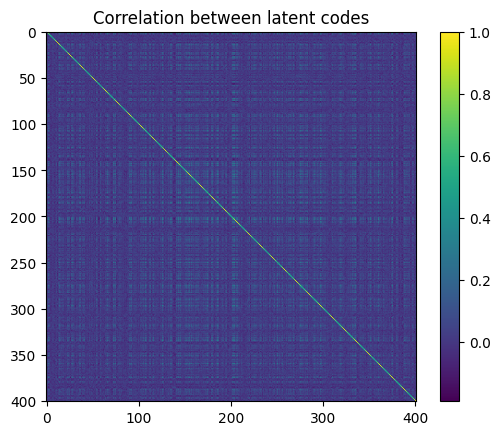

In [17]:
#Lets plot the correlation between the latent codes

corr = np.corrcoef(latent_codes)
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation between latent codes")

  0%|          | 0/18 [00:00<?, ?it/s]c:\Users\USER\anaconda3\envs\geofree\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
  6%|▌         | 1/18 [00:00<00:03,  4.72it/s]c:\Users\USER\anaconda3\envs\geofree\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\USER\anaconda3\envs\geofree\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\USER\an

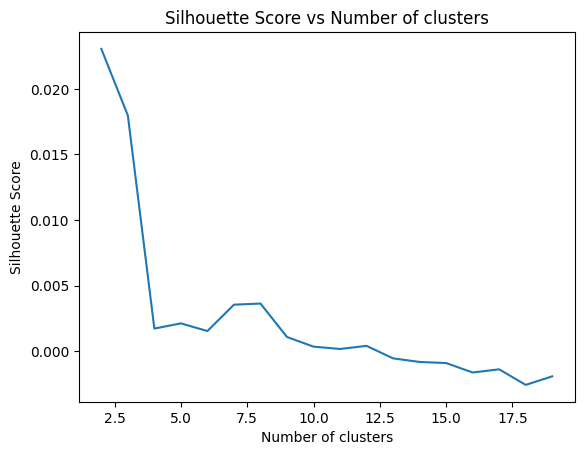

In [18]:
# Now we will use a clustering method to cluster the latent codes with out using explicit number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We will use the silhouette score to find the best number of clusters
silhouette_scores = []
for n_clusters in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(latent_codes)
    silhouette_scores.append(silhouette_score(latent_codes, cluster_labels))

plt.plot(range(2, 20), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of clusters")
plt.show()



In [22]:
cluster_labels = KMeans(n_clusters=10, random_state=10).fit_predict(latent_codes)


c:\Users\USER\anaconda3\envs\geofree\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [23]:
cluster_labels

array([3, 9, 4, 4, 0, 9, 5, 2, 0, 6, 7, 8, 9, 8, 1, 8, 2, 3, 3, 8, 5, 2,
       5, 4, 2, 8, 6, 1, 4, 1, 2, 7, 8, 2, 0, 8, 4, 4, 7, 2, 8, 3, 9, 0,
       8, 5, 0, 4, 9, 3, 2, 5, 8, 6, 4, 2, 0, 0, 5, 4, 0, 2, 0, 5, 2, 2,
       4, 2, 8, 8, 7, 9, 7, 4, 3, 4, 5, 8, 2, 2, 3, 8, 7, 8, 6, 0, 8, 5,
       2, 7, 4, 4, 4, 6, 1, 2, 8, 2, 9, 9, 3, 7, 2, 8, 2, 4, 0, 4, 3, 8,
       7, 2, 4, 4, 5, 2, 4, 8, 2, 8, 3, 1, 5, 0, 4, 9, 4, 3, 6, 3, 8, 2,
       3, 9, 8, 4, 8, 9, 5, 7, 0, 4, 8, 4, 2, 4, 8, 8, 8, 2, 2, 4, 4, 2,
       4, 4, 6, 4, 3, 4, 7, 3, 4, 4, 4, 4, 2, 2, 8, 8, 2, 8, 3, 2, 2, 4,
       7, 0, 9, 4, 4, 8, 7, 2, 8, 4, 4, 8, 5, 2, 1, 4, 2, 6, 8, 4, 0, 6,
       8, 8, 5, 2, 4, 4, 4, 2, 4, 4, 3, 2, 6, 4, 2, 8, 6, 3, 2, 0, 8, 1,
       4, 7, 4, 2, 2, 4, 8, 2, 2, 2, 8, 2, 4, 2, 5, 4, 5, 4, 5, 4, 0, 9,
       1, 2, 9, 8, 2, 4, 0, 6, 4, 2, 5, 1, 5, 2, 4, 7, 3, 7, 4, 6, 4, 8,
       4, 7, 2, 6, 4, 8, 6, 8, 2, 8, 8, 3, 4, 8, 4, 2, 8, 4, 3, 4, 6, 2,
       9, 0, 8, 9, 4, 2, 8, 0, 4, 8, 2, 4, 8, 3, 8,

In [ ]:
# For each cluster we will load 10 images form each scene in the cluster
images_folder = "../../../Realstate10K/RealEstate10K_Downloader/RealEstate10K/test/"
# for each cluste we will have a figure with 10 rows and  scenes in the cluster columns
# each row will have 10 images from the same scene
for cluster in np.unique(cluster_labels):
   
    cluster_scenes = np.where(cluster_labels == cluster)[0]
    # Randomly select max 10 scenes from the cluster
    cluster_scenes = np.random.choice(cluster_scenes, min(10, len(cluster_scenes)), replace=False)

    number_of_scenes = len(cluster_scenes)
    if number_of_scenes < 2:
        continue
    fig, axs = plt.subplots(5, number_of_scenes, figsize=(80, 80))
    fig.suptitle(f"Cluster {cluster}")

    
    print(f"Cluster {cluster} has the following scenes {[data_files[i] for i in cluster_scenes]}")
    for x,scene_idx in enumerate(cluster_scenes):
        frames = images_folder + data_files[scene_idx].split(".")[0] + "/frames/" 
        frames = os.listdir(frames)
        # get 10 images uniformly spaced
        indices = np.linspace(0, len(frames)-1, 5, dtype=int)
        for i,img_idx in enumerate(indices):
            pth = images_folder + data_files[scene_idx].split(".")[0] + "/frames/" + frames[img_idx]
            img = Image.open(pth)
            axs[i,x].imshow(img)
            axs[i,x].axis("off")


    plt.show()


        
        
        